In [1]:
#En el siguiente ejercicio se tiene un dataset de clientes de una entidad bancaria,
#se usará una red neuronal para validar cuantas de estos clientes, se retirarán de la entidad
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('sample_data/redNeuronal.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X = dataset.iloc[:, 3:13].values
X
#se toman los datos representativos variables indepenientes, notese columna 3 (creditScore) hasta la columna 13 (EstimatedSalary)

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [4]:
y = dataset.iloc[:, 13].values
y
#variable de respuesta

array([1, 0, 1, ..., 1, 1, 0])

In [5]:
#Los campos (catégoricos) se convierten a estilo binarios
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X1 = LabelEncoder()
X[:,1] = labelencoder_X1.fit_transform(X[:,1])
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
labelencoder_X2 = LabelEncoder()
X[:,2] = labelencoder_X2.fit_transform(X[:,2])

In [7]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ("redNeuronal",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [1]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)

X = transformer.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
X = X[:, 1:]

In [10]:
type(X)

numpy.ndarray

In [11]:
from sklearn.model_selection import train_test_split
#Separamos los datos con un corte del 20% de forma aleatoria (son 10,000 registros en total)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
#Se transforman los datos (escala) a media de cero y desviación estandar 1
from sklearn.preprocessing import StandardScaler
sX = StandardScaler()
X_train = sX.fit_transform(X_train)
X_test = sX.transform(X_test)

In [12]:
#construimos nuestra red neuronal
import keras
from keras.models import Sequential
from keras.layers import Dense

claf = Sequential()# se inicializa la secuencia

In [13]:
#primera capa
claf.add(Dense(units = 6,kernel_initializer = "uniform", activation = "relu", input_dim = 11))


In [14]:
#segunda capa
claf.add(Dense(units = 6,kernel_initializer = "uniform", activation = "relu"))


#tercera capa
claf.add(Dense(units = 1,kernel_initializer = "uniform", activation = "sigmoid"))
#compilador.
claf.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
#comienza el entrenamiento, por favor espere que son varios datos
claf.fit(X_train, Y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 3s 2ms/step - loss: 0.4857 - accuracy: 0.7956
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4305 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4220 - accuracy: 0.8083
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4181 - accuracy: 0.8234
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8269
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4151 - accuracy: 0.8281
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4129 - accuracy: 0.8294
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8324
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4111 - accura

In [15]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    COn esto se imprime y genera gráfico de confusión.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
#predecir
y_pred = claf.predict(X_test)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0.2452504 ],
       [0.36162055],
       [0.16653949],
       ...,
       [0.18583831],
       [0.17694132],
       [0.12955405]], dtype=float32)

In [17]:
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [18]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print((cm[0][0]+cm[1][1])/cm.sum())

0.8405


Confusion matrix, without normalization
[[1534   61]
 [ 258  147]]


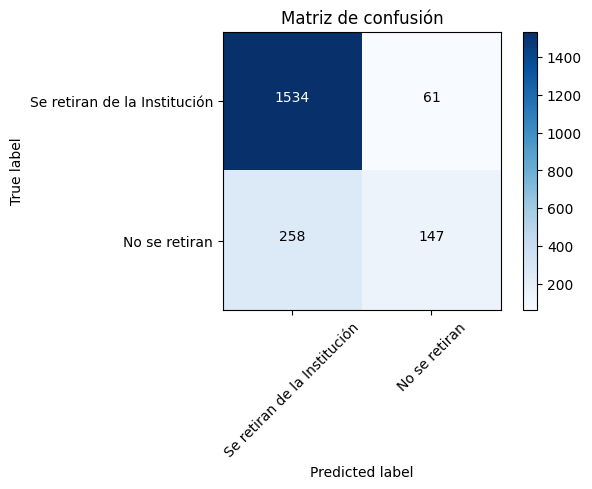

In [19]:
plot_confusion_matrix(cm, ['Se retiran de la Institución','No se retiran'],title='Matriz de confusión')